In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data

Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
temps_df = data.sf_temps()
print(temps_df.dtypes)
temps_df

temp           float64
date    datetime64[ns]
dtype: object


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
temps_df['day_of_week'] = temps_df['date'].dt.day_name()
temps_df

,temp,date,day_of_week
0,47.8,2010-01-01 00:00:00,Friday
1,47.4,2010-01-01 01:00:00,Friday
2,46.9,2010-01-01 02:00:00,Friday
3,46.5,2010-01-01 03:00:00,Friday
4,46.0,2010-01-01 04:00:00,Friday
...,...,...,...
8754,50.4,2010-12-31 19:00:00,Friday
8755,49.9,2010-12-31 20:00:00,Friday
8756,49.4,2010-12-31 21:00:00,Friday
8757,48.8,2010-12-31 22:00:00,Friday


In [4]:
temps_df = temps_df.set_index('date').sort_index()
temps_df

,temp,day_of_week
date,,
2010-01-01 00:00:00,47.8,Friday
2010-01-01 01:00:00,47.4,Friday
2010-01-01 02:00:00,46.9,Friday
2010-01-01 03:00:00,46.5,Friday
2010-01-01 04:00:00,46.0,Friday
...,...,...
2010-12-31 19:00:00,50.4,Friday
2010-12-31 20:00:00,49.9,Friday
2010-12-31 21:00:00,49.4,Friday


In [5]:
temps_df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


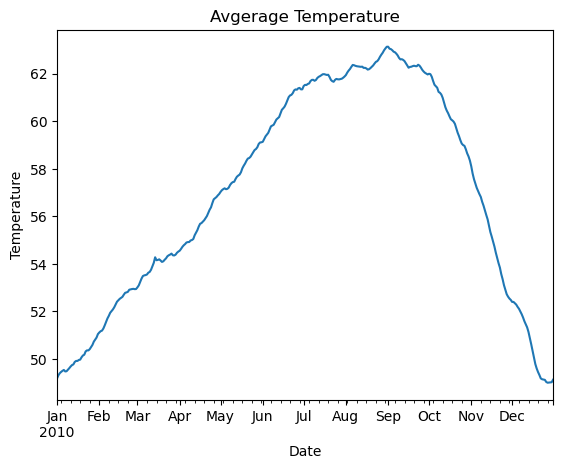

In [6]:
temps_df.resample('D').mean()['temp'].plot()
plt.title("Avgerage Temperature")
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

Write the code necessary to visualize the minimum temperature over time.

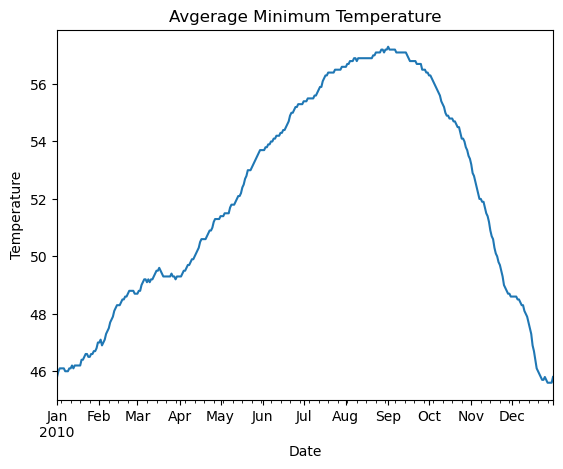

In [7]:
temps_df.resample('D').min()['temp'].plot()
plt.title("Avgerage Minimum Temperature")
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

Write the code necessary to visualize the maximum temperature over time.

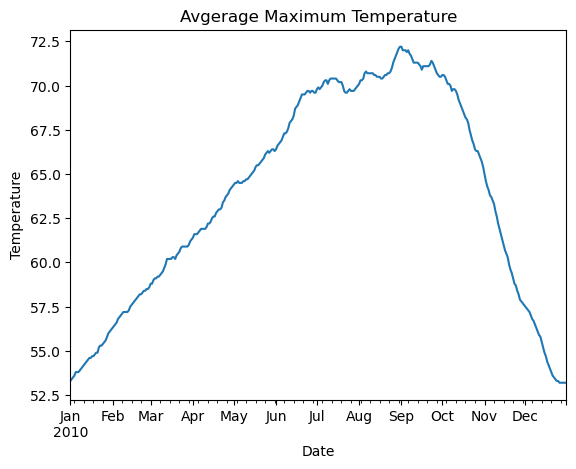

In [8]:
temps_df.resample('D').max()['temp'].plot()
plt.title("Avgerage Maximum Temperature")
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

Which month is the coldest, on average?

In [9]:
temps_df.resample('M').mean()['temp'].idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

Which month has the highest average temperature?

In [10]:
temps_df.resample('M').mean()['temp'].idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [11]:
temps_df.resample('D').agg('min')['temp'].idxmax()

Timestamp('2010-09-01 00:00:00', freq='D')

In [12]:
temps_df.resample('D').agg('max')['temp'].idxmax()

Timestamp('2010-08-31 00:00:00', freq='D')

Which year and month combination has the highest amount of precipitation?

In [13]:
seattle_df = data.seattle_weather()
seattle_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Visualize the amount of monthly precipitation over time.

In [14]:
seattle_df = seattle_df.set_index('date').sort_index()
seattle_df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


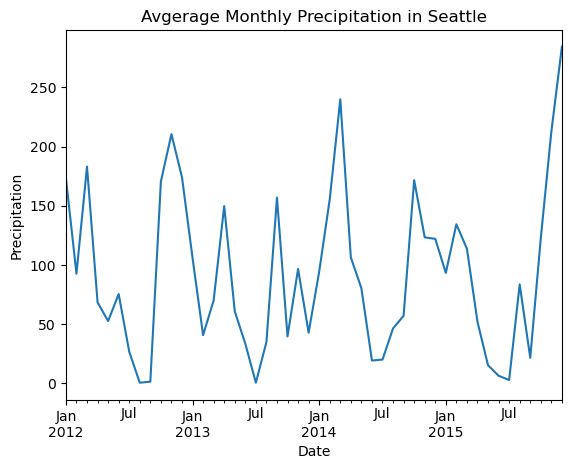

In [15]:
seattle_df.resample('M').sum()['precipitation'].plot()
plt.title("Avgerage Monthly Precipitation in Seattle")
plt.ylabel('Precipitation')
plt.xlabel('Date')
plt.show()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

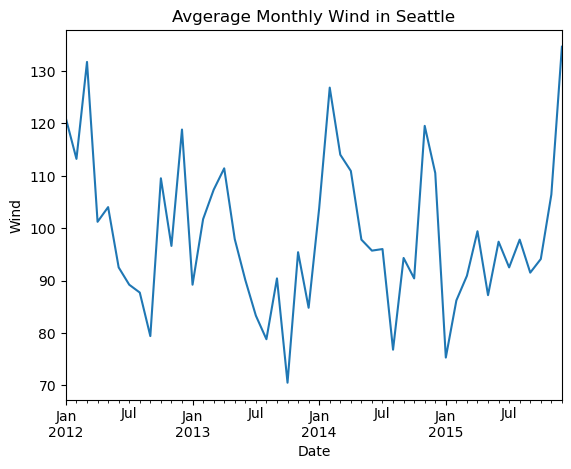

In [16]:
seattle_df.resample('M').sum()['wind'].plot()
plt.title("Avgerage Monthly Wind in Seattle")
plt.ylabel('Wind')
plt.xlabel('Date')
plt.show()

Which year-month combination is the windiest?

In [17]:
seattle_df.resample('Y').agg('max')['wind'].index.strftime('%B %Y').sort_values(ascending=False)

Index(['December 2015', 'December 2014', 'December 2013', 'December 2012'], dtype='object', name='date')

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [18]:
seattle_df.resample('Y').agg('max')[seattle_df['weather'] == 'sun']

/var/folders/9q/slnrpghs0r78mkz6d7_q_hj40000gp/T/ipykernel_7069/3950255711.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seattle_df.resample('Y').agg('max')[seattle_df['weather'] == 'sun']


,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2013-12-31,43.4,33.9,18.3,8.8,sun
2014-12-31,46.7,35.6,17.8,8.8,sun
2015-12-31,55.9,35.0,18.3,8.0,sun


In which month does it rain the most?

In [19]:
seattle_df.resample('M').max()['precipitation'].sort_values(ascending=False).head(1)

date
2015-03-31    55.9
Name: precipitation, dtype: float64

Which month has the most number of days with a non-zero amount of precipitation?

Convert any negative delays to 0.


In [20]:
flights_df = data.flights_20k()
flights_df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [21]:
flights_df = flights_df.set_index('date').sort_index()
flights_df

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,-5,318,FLL,JAX
2001-03-31 21:05:00,-1,451,MCI,IND


In [22]:
flights_df['delay'].value_counts()

 0      2034
-5      1437
-2       892
-3       803
-10      796
        ... 
 370       1
 245       1
 509       1
 178       1
 196       1
Name: delay, Length: 233, dtype: int64

In [23]:
flights_df['delay'] = flights_df['delay'].clip(lower=0)


In [25]:
flights_df

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


Which hour of the day has the highest average delay?

In [31]:
flights_df.resample('H').mean()['delay'].sort_values(ascending=False).head(1)

date
2001-02-23 03:00:00    360.0
Name: delay, dtype: float64

Does the day of the week make a difference in the delay amount?


In [50]:
day_delay = flights_df.resample('d').sum()['delay'].sort_values(ascending= False)
day_delay.index.strftime('%A')

Index(['Friday', 'Friday', 'Thursday', 'Friday', 'Friday', 'Thursday',
       'Wednesday', 'Wednesday', 'Thursday', 'Friday', 'Friday', 'Tuesday',
       'Sunday', 'Tuesday', 'Sunday', 'Wednesday', 'Thursday', 'Wednesday',
       'Tuesday', 'Thursday', 'Friday', 'Saturday', 'Thursday', 'Friday',
       'Tuesday', 'Thursday', 'Tuesday', 'Monday', 'Wednesday', 'Saturday',
       'Sunday', 'Friday', 'Wednesday', 'Monday', 'Sunday', 'Sunday', 'Friday',
       'Monday', 'Friday', 'Friday', 'Monday', 'Wednesday', 'Wednesday',
       'Thursday', 'Sunday', 'Monday', 'Thursday', 'Tuesday', 'Monday',
       'Saturday', 'Saturday', 'Monday', 'Sunday', 'Thursday', 'Saturday',
       'Wednesday', 'Wednesday', 'Tuesday', 'Sunday', 'Sunday', 'Friday',
       'Wednesday', 'Monday', 'Sunday', 'Sunday', 'Monday', 'Tuesday',
       'Saturday', 'Sunday', 'Saturday', 'Saturday', 'Thursday', 'Tuesday',
       'Saturday', 'Saturday', 'Saturday', 'Thursday', 'Wednesday', 'Thursday',
       'Tuesday', 'Monday'

Does the month make a difference in the delay amount?